In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__


'2.3.0+cu121'

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],len(X)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 50)

In [3]:
y[:10], len(y)

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50)

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predict(train_data=X_train,
                 train_label=y_train,
                 test_data=X_test,
                 test_label=y_test,
                 predictions=None):
  '''
  Plots training data, test data, and compares predictions.
  '''
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_label, c='b', s=4, label='training data')
  plt.scatter(test_data, test_label, c='g', s=4, label='testing data')
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='predictions')
  plt.legend(prop={'size':14})

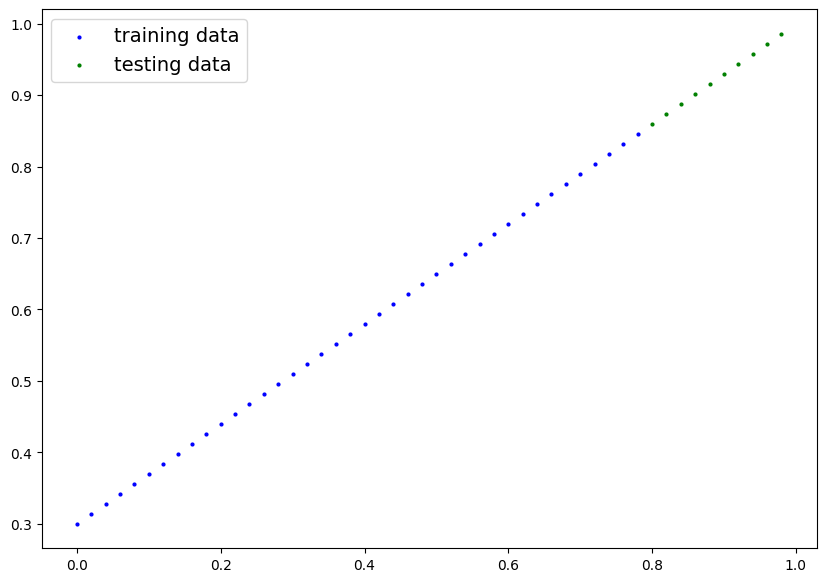

In [6]:
plot_predict()

## Building Model

In [7]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                                requires_grad=True,
                                dtype=torch.float
                                ))
    self.bias = nn.Parameter(torch.rand(1,
                                requires_grad=True,
                                dtype=torch.float
                                ))
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [25]:
torch.manual_seed(42)
model0 = LinearRegressionModel()
model0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [9]:
weight, bias

(0.7, 0.3)

## Making Predictions with `torch.inference_mode()`

In [10]:
with torch.inference_mode():
  y_preds = model0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [11]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

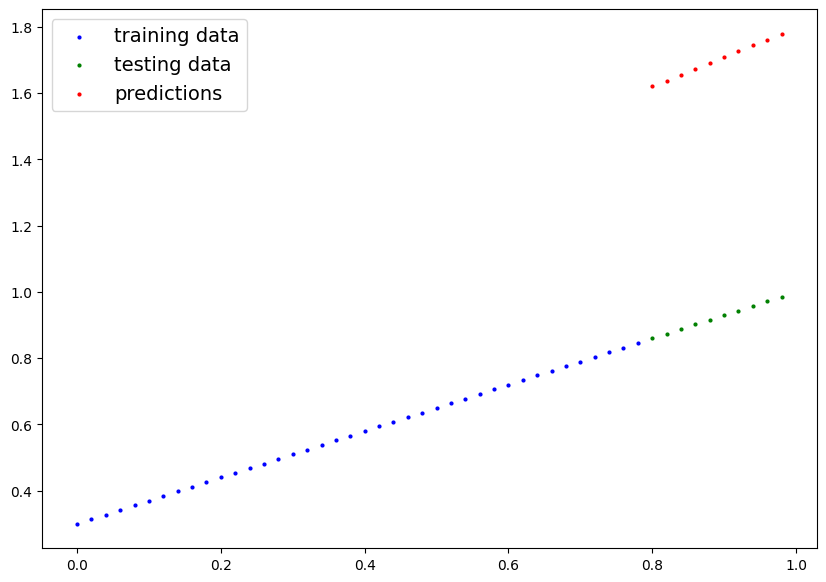

In [12]:
plot_predict(predictions=y_preds)

## Training model
* We can use *loss functions* to determine a model's performence
* We can use an *optimizer function* to adjust model parameters using loss function
* We then need a training loop and testing loop

In [26]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.01)

There are 5 steps to training loop
1. set up model to training mode
2. go through the data in forward pass
3. calculate the loss for model points
4. compute back propogation
5. optimizer step that performs stochastic gradient descent

In [27]:
torch.manual_seed(42)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  # set up model for train mode
  model0.train()

  # forward pass
  y_pred = model0(X_train)

  # calculate loss
  loss = loss_fn(y_pred, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # loss backward back propogation
  loss.backward()

  # optimizer step
  optimizer.step()

  model0.eval()

  # print(f'Epoch: {epoch}, Loss: {loss}')

  ## Testing
  with torch.inference_mode():
    test_preds = model0(X_test)
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f'Epoch: {epoch}, Loss: {loss}, Test Loss: {test_loss}')


Epoch: 0, Loss: 0.6860889196395874, Test Loss: 0.7637526988983154
Epoch: 10, Loss: 0.5708791017532349, Test Loss: 0.6290428042411804
Epoch: 20, Loss: 0.45566922426223755, Test Loss: 0.4943329691886902
Epoch: 30, Loss: 0.34045934677124023, Test Loss: 0.35962313413619995
Epoch: 40, Loss: 0.2252494841814041, Test Loss: 0.2249133139848709
Epoch: 50, Loss: 0.1100396141409874, Test Loss: 0.09020347893238068
Epoch: 60, Loss: 0.009724985808134079, Test Loss: 0.020998019725084305
Epoch: 70, Loss: 0.006216754671186209, Test Loss: 0.014099234715104103
Epoch: 80, Loss: 0.002788322512060404, Test Loss: 0.005826681852340698
Epoch: 90, Loss: 0.007095950655639172, Test Loss: 0.00754010071977973
Epoch: 100, Loss: 0.007095950655639172, Test Loss: 0.00754010071977973
Epoch: 110, Loss: 0.007095950655639172, Test Loss: 0.00754010071977973
Epoch: 120, Loss: 0.007095950655639172, Test Loss: 0.00754010071977973
Epoch: 130, Loss: 0.007095950655639172, Test Loss: 0.00754010071977973
Epoch: 140, Loss: 0.00709595

In [28]:
with torch.inference_mode():
  y_preds_new = model0(X_test)

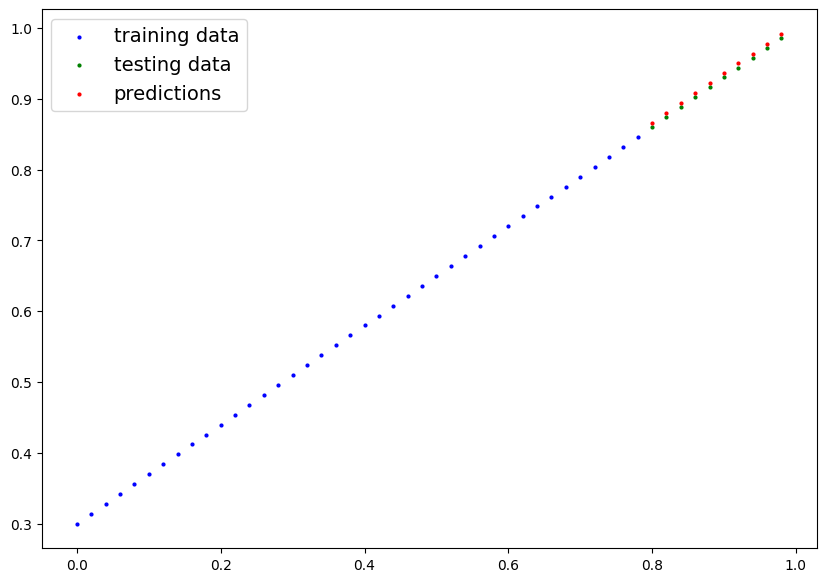

In [29]:
plot_predict(predictions=y_preds_new)

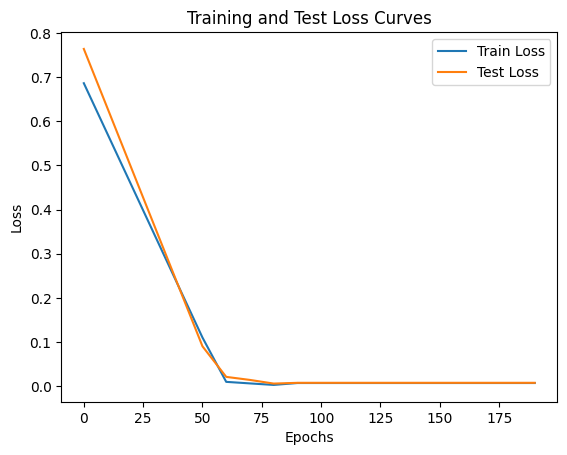

In [30]:
# plot loss curves
plt.plot(epoch_count, loss_values, label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title('Training and Test Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

## Saving Models
1. torch.save() - uses Python pickle format
2. torch.load() - allows to load saved object
3. torch.nn.Module.load_state_dict() - loads model's state